In [4]:
# pip install mlxtend --upgrade # run once

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.9 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [5]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [8]:
# Reading the data
df = pd.read_csv("pubg.csv")

In [ ]:
df.head()

Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0         0.00      0              0      0         60  ...        0   
1        91.47      0              0      0         57  ...        0   
2        68.00      0              0      0         47  ...        0   
3        32.90      0              0      0         75  ...        0   
4       100.00      0              0      0         45  ...        0   

   rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0        0.0000          0          0.00          0               0   
1        0.0045          0         11.04          0               0   
2        0.0000          0          0.00          0               0   
3        0.0000          0          0.00          0               0   
4        0.0000          0          0.00          0               0   

   walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0        244.80                1       1466        0.4444  
1       1434.00                5          0        0.6400  
2        161.80                2          0        0.7755  
3        202.70                3          0        0.1667  
4         49.75                2          0        0.1875  

[5 rows x 29 columns]

In [ ]:
df.shape

(35347, 29)

In [ ]:
# Checking for null values
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          1
swimDistance       1
teamKills          1
vehicleDestroys    1
walkDistance       1
weaponsAcquired    1
winPoints          1
winPlacePerc       1
dtype: int64

In [ ]:
# Viewing null value row
df[df.isnull().any(axis=1)]

Id         groupId         matchId  assists  boosts  \
35346  85bd8488811247  de04bda94fde7f  415bb071fa0ac1        2       0   

       damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
35346        66.35      1              0      1         54  ...        2   

       rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
35346           0.0        NaN           NaN        NaN             NaN   

       walkDistance  weaponsAcquired  winPoints  winPlacePerc  
35346           NaN              NaN        NaN           NaN  

[1 rows x 29 columns]

There are many null values in this row hence we can drop this row

In [9]:
# Removing the null values
df = df.dropna()

In [ ]:
# Checking the null values after removing the null values
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [ ]:
# Checking for duplicate data
sum(df.duplicated())

0

There is no duplicate data

In [ ]:
# Checking the datatype of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35346 entries, 0 to 35345
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               35346 non-null  object 
 1   groupId          35346 non-null  object 
 2   matchId          35346 non-null  object 
 3   assists          35346 non-null  int64  
 4   boosts           35346 non-null  int64  
 5   damageDealt      35346 non-null  float64
 6   DBNOs            35346 non-null  int64  
 7   headshotKills    35346 non-null  int64  
 8   heals            35346 non-null  int64  
 9   killPlace        35346 non-null  int64  
 10  killPoints       35346 non-null  int64  
 11  kills            35346 non-null  int64  
 12  killStreaks      35346 non-null  int64  
 13  longestKill      35346 non-null  float64
 14  matchDuration    35346 non-null  int64  
 15  matchType        35346 non-null  object 
 16  maxPlace         35346 non-null  int64  
 17  numGroups   

In [ ]:
# Taking out Numerical data
df_num = df.select_dtypes(include=['int','float64'])
print('Total number of Integer columns: ',len(df_num.columns))
df_num.columns

Total number of Integer columns:  25


Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [ ]:
# Taking out Caterorical data
df_cat = df.select_dtypes(include=['object'])
print('Total number of Caterorical columns: ',len(df_cat.columns))
df_cat.columns

Total number of Caterorical columns:  4


Index(['Id', 'groupId', 'matchId', 'matchType'], dtype='object')

# Categorical Columns

## ID

In [ ]:
print('Total Number of Unique values in ID Column: ',df['Id'].nunique())

Total Number of Unique values in ID Column:  35346


## Group ID

In [ ]:
print('Total Number of Unique values in Group ID Column: ',df['groupId'].nunique())

Total Number of Unique values in Group ID Column:  35032


## Match ID

In [ ]:
print('Total Number of Unique values in Match ID Column: ',df['matchId'].nunique())

Total Number of Unique values in Match ID Column:  25085


## Match Type

In [ ]:
print('Number of unique values in Match Type: ',df['matchType'].nunique())
print('\nThe unique values of Match Types are :\n',df['matchType'].unique())
print('\nThe count of each values in Match Type is\n',df['matchType'].value_counts())

Number of unique values in Match Type:  15

The unique values of Match Types are :
 ['squad-fpp' 'duo' 'solo-fpp' 'squad' 'duo-fpp' 'solo' 'normal-squad-fpp'
 'crashfpp' 'flaretpp' 'normal-solo-fpp' 'flarefpp' 'normal-duo-fpp'
 'normal-duo' 'normal-squad' 'crashtpp']

The count of each values in Match Type is
 squad-fpp           13884
duo-fpp              8045
squad                5003
solo-fpp             4250
duo                  2489
solo                 1399
normal-squad-fpp      131
crashfpp               59
normal-duo-fpp         44
flaretpp               15
normal-solo-fpp        10
flarefpp                7
normal-squad            6
normal-duo              2
crashtpp                2
Name: matchType, dtype: int64


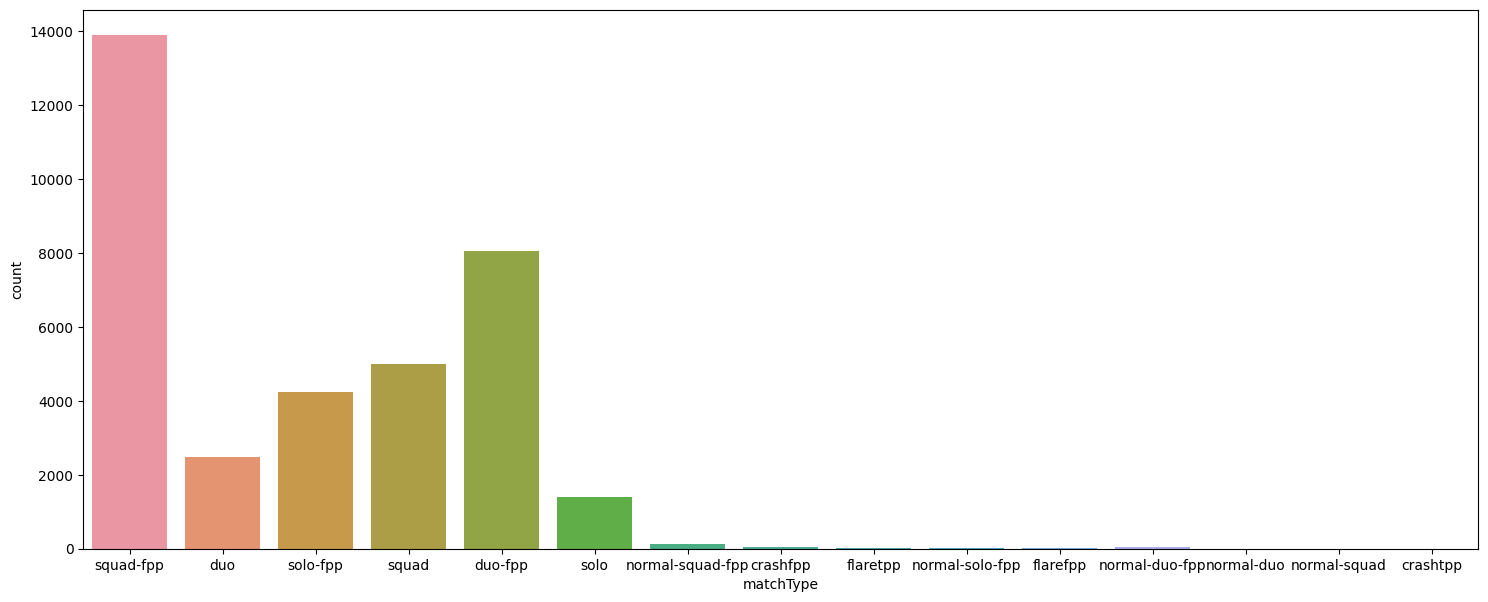

In [ ]:
plt.figure(figsize = (18, 7))
sns.countplot(x=df.matchType)
plt.show()

Since there are many categories for matchType column, they have been grouped together into 3 categories: 'solo', 'duo' and 'crash' using lambda function.

In [ ]:
t = list(df.matchType.unique())
solo = 0
squad = 0
duo = 0
fpp = 0
tpp = 0
for i in df.matchType:
    if 'solo' in i:
        solo += 1
    elif 'duo' in i:
        duo += 1
    elif 'squad' in i:
        squad += 1

for i in df.matchType:
    if 'fpp' in i:
        fpp += 1
    else:
        tpp += 1
        
match_type_sdq = [solo,duo,squad]
match_type_pp = [fpp, tpp]

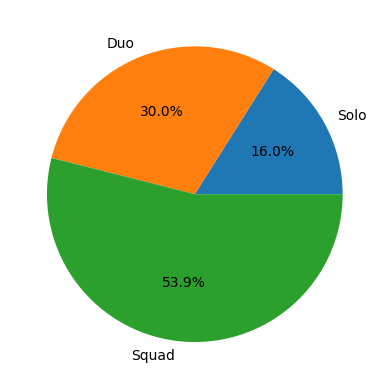

In [ ]:
plt.pie(x=match_type_sdq, autopct='%1.1f%%', labels=['Solo','Duo','Squad'])
plt.show()

The match type squad was played a lot when compared to solo and duo

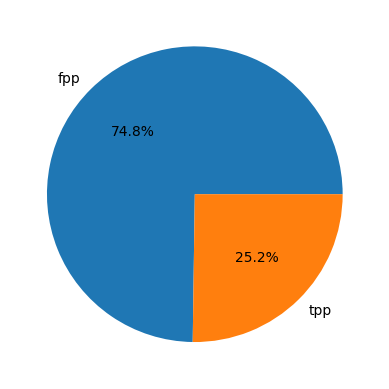

In [ ]:
plt.pie(x=match_type_pp, autopct='%1.1f%%', labels=['fpp','tpp'])
plt.show()

The match was mostlyplayed in first person perspective

# Numerical Columns

## Assists

<Axes: xlabel='assists', ylabel='count'>

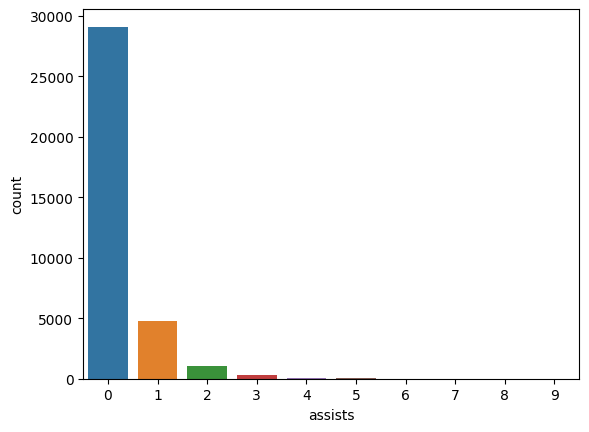

In [ ]:
sns.countplot(x = df.assists)

Mostly many players didnt get assist, this explains that mostly when some is targeted they get killed by the same person

## Boosts

<Axes: xlabel='boosts', ylabel='winPlacePerc'>

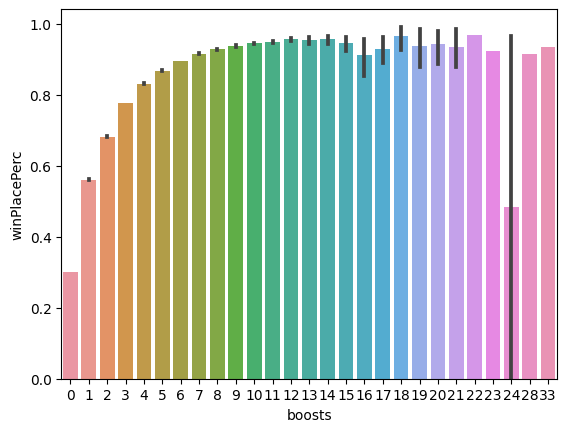

In [ ]:
sns.barplot(x = df.boosts, y = df.winPlacePerc)

The top winner mostly used many boosts

## Damage Dealt

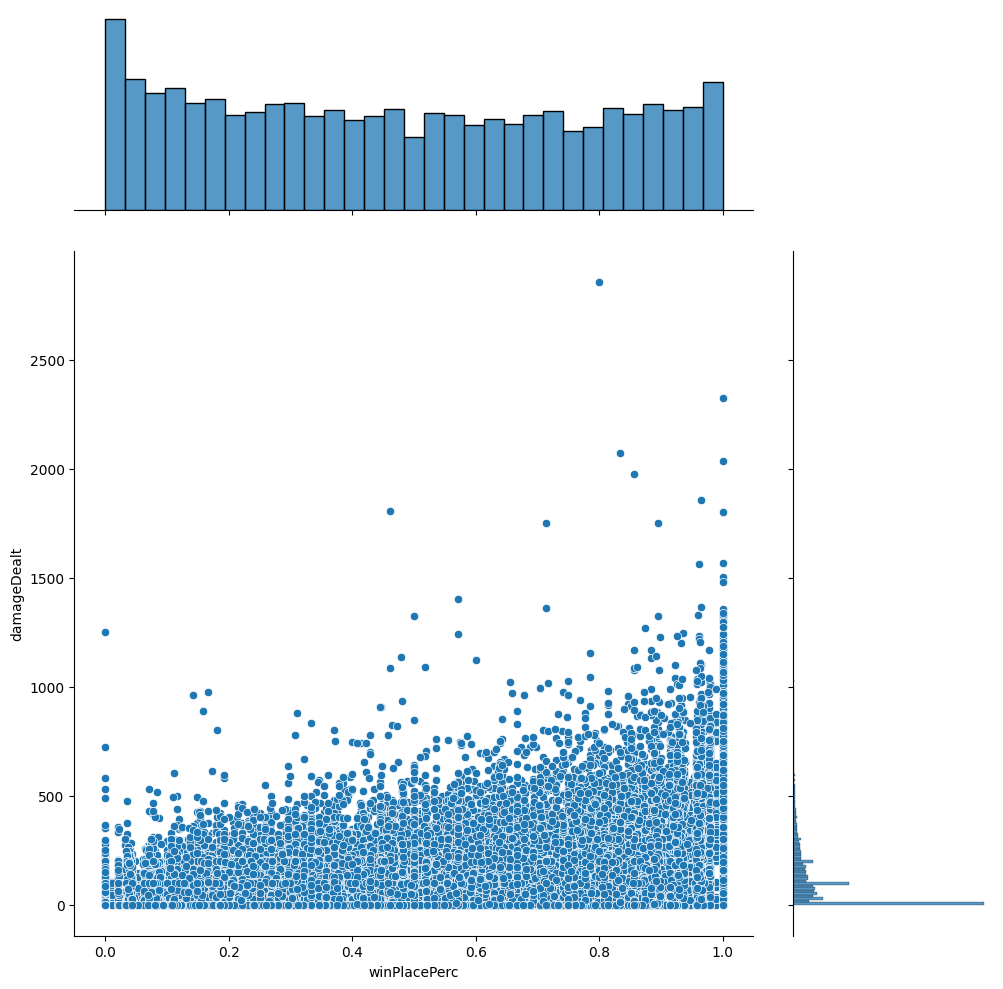

In [ ]:
sns.jointplot(x="winPlacePerc", y="damageDealt", data=df, height=10, ratio=3)
plt.show()

## DBNOs - Knocked but not out - In revive state

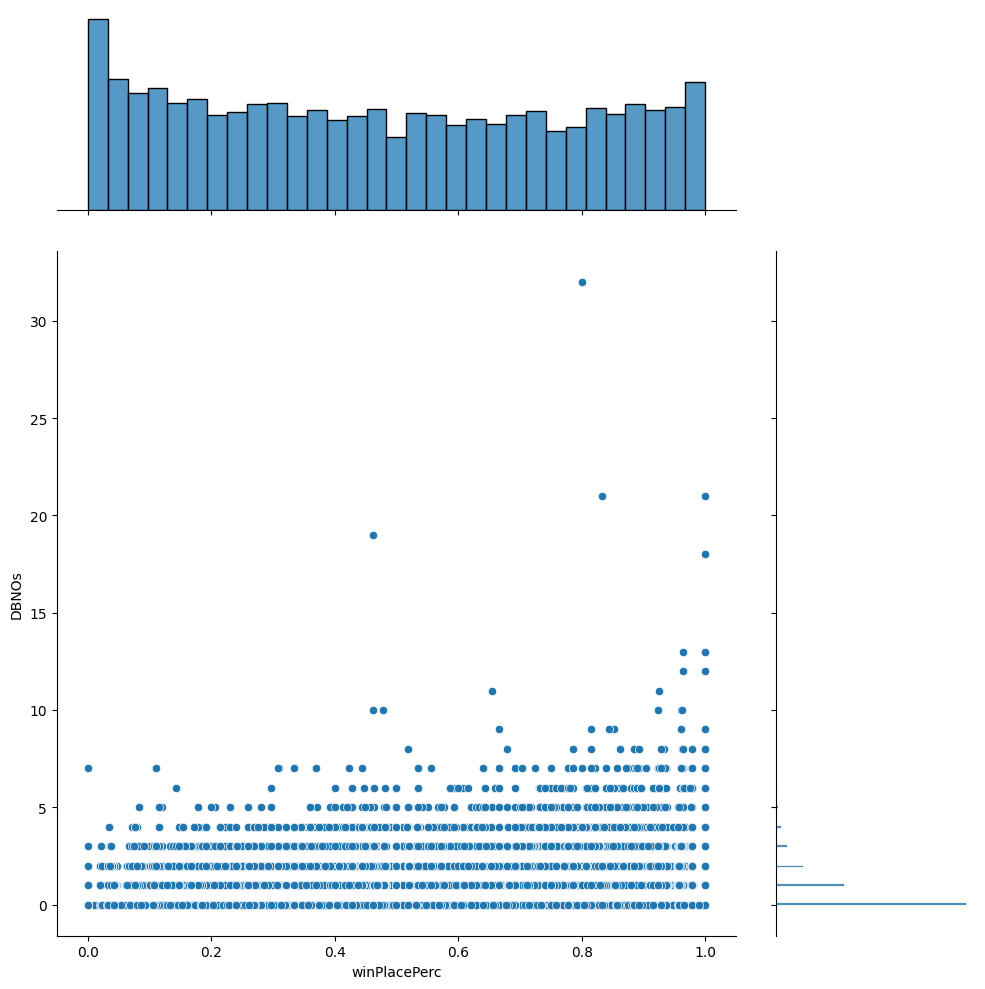

In [ ]:
sns.jointplot(x="winPlacePerc", y="DBNOs", data=df, height=10, ratio=3)
plt.show()

The players who won get high number of knocks

## Head Shot Kills

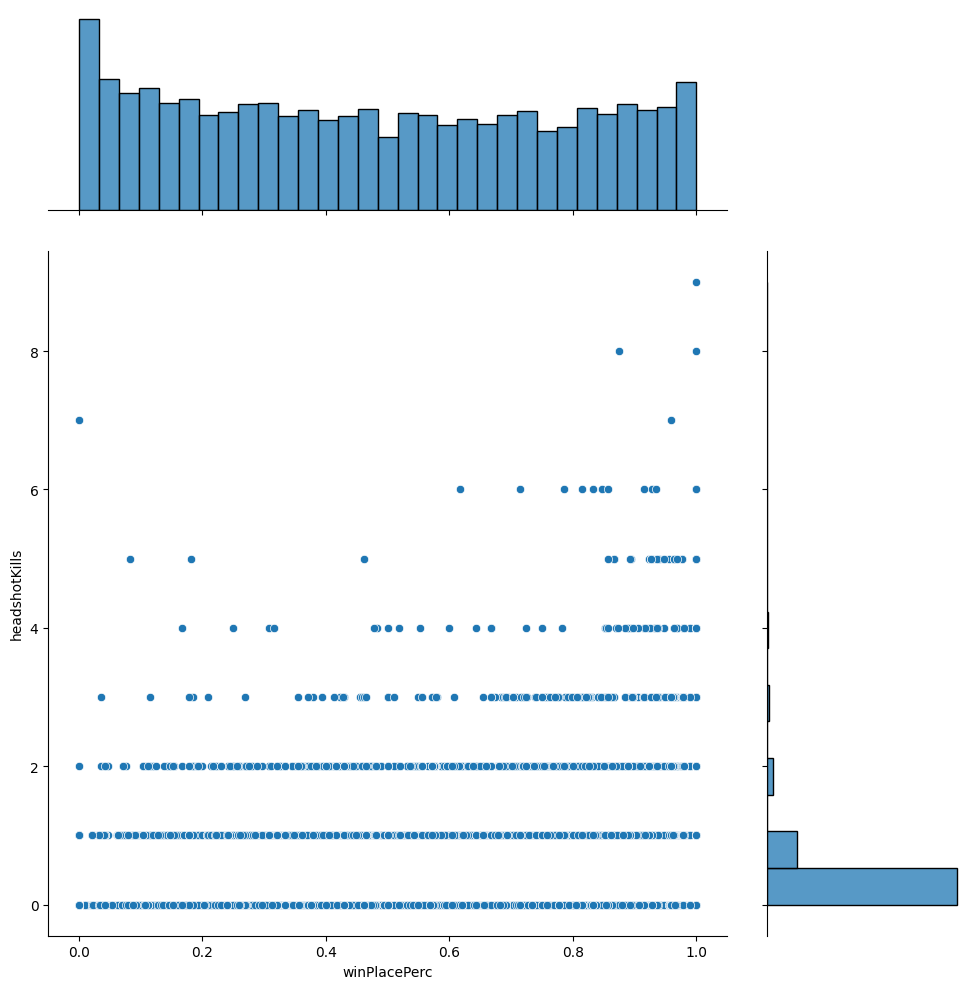

In [ ]:
sns.jointplot(x="winPlacePerc", y="headshotKills", data=df, height=10, ratio=3)
plt.show()

The top players get most head shot kills

## Heals

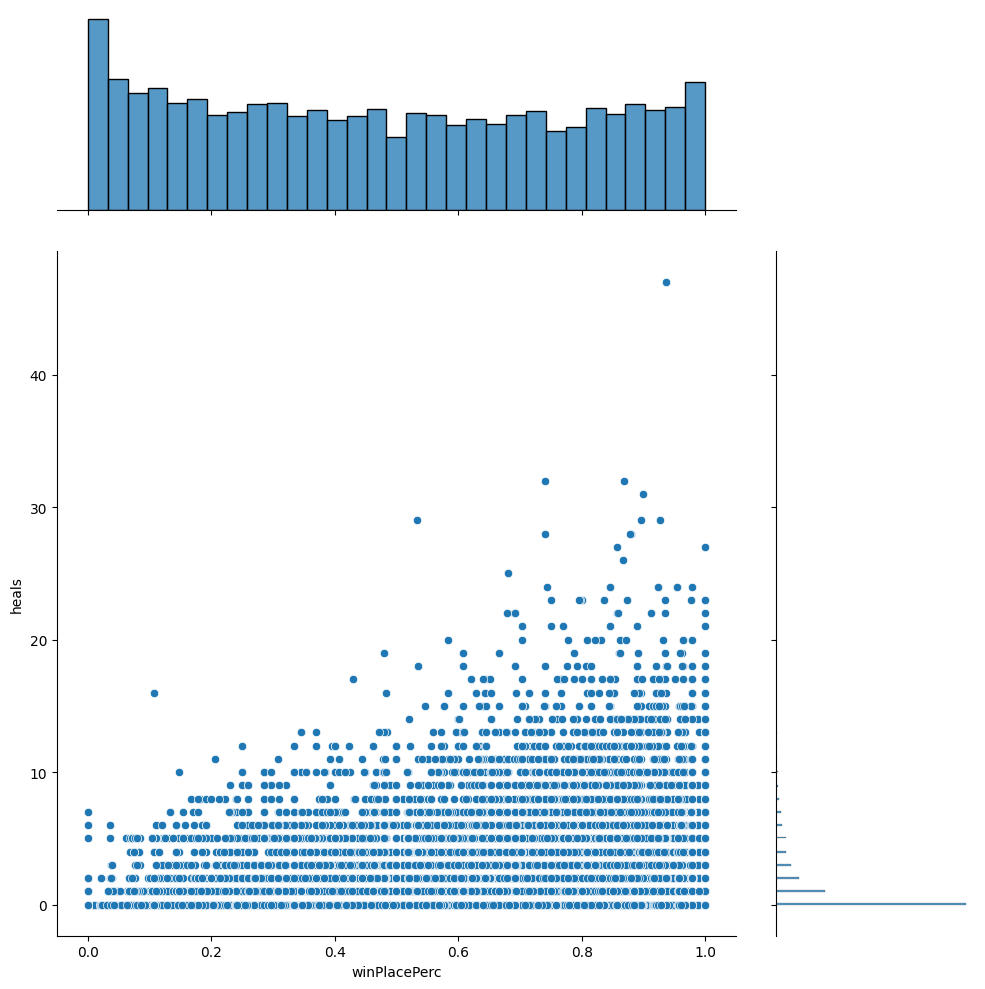

In [ ]:
sns.jointplot(x="winPlacePerc", y="heals", data=df, height=10, ratio=3)
plt.show()

The player with top ranks uses most healing medics

## Kill Place

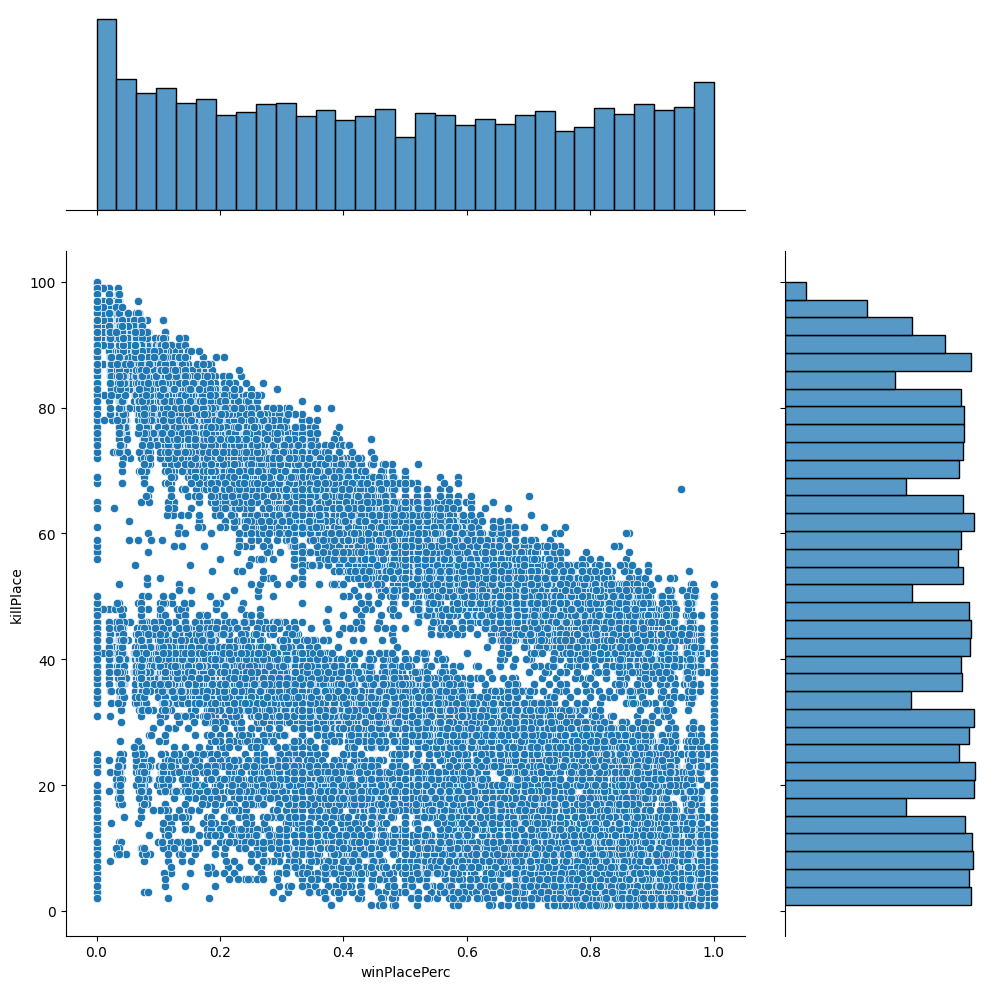

In [ ]:
sns.jointplot(x="winPlacePerc", y="killPlace", data=df, height=10, ratio=3)
plt.show()

The kill place is high when you get killed very early in the match

## Kill Points

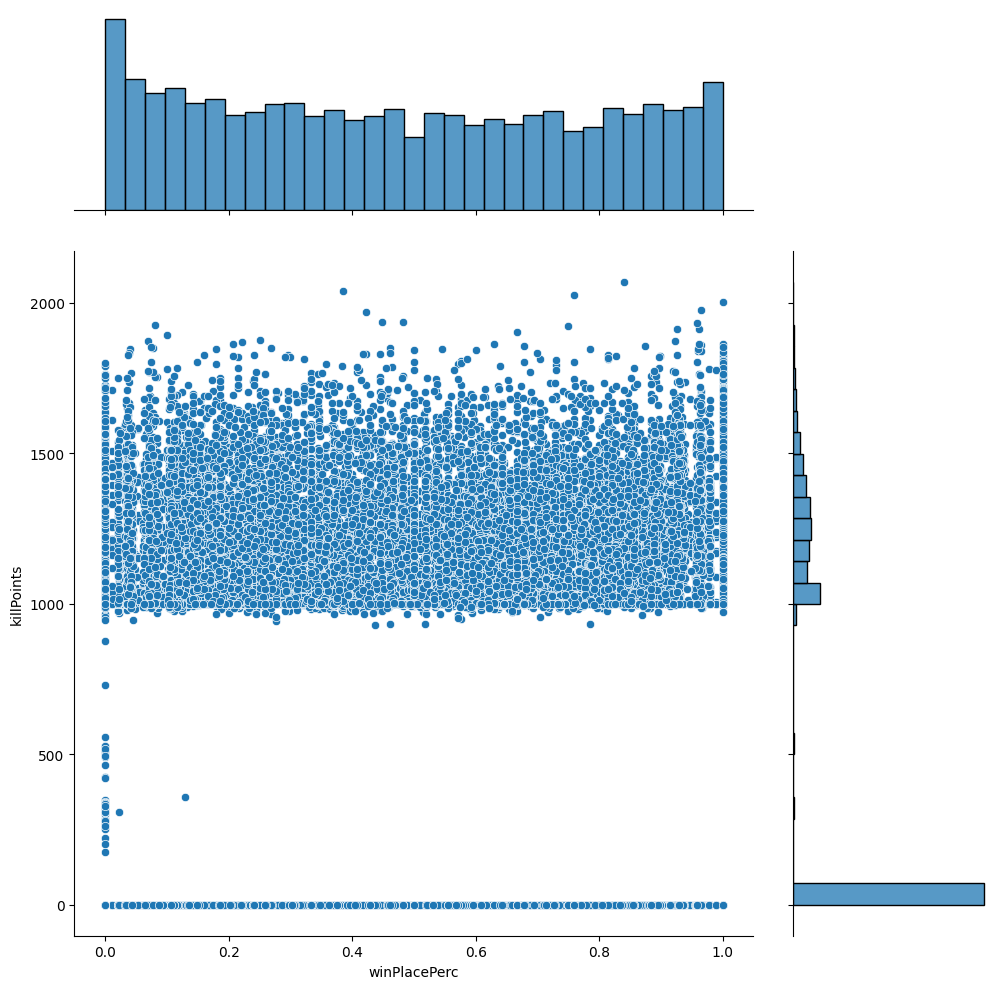

In [ ]:
sns.jointplot(x="winPlacePerc", y="killPoints", data=df, height=10, ratio=3)
plt.show()

Mostly all the player gets killpoints atleast 1000

## Kills

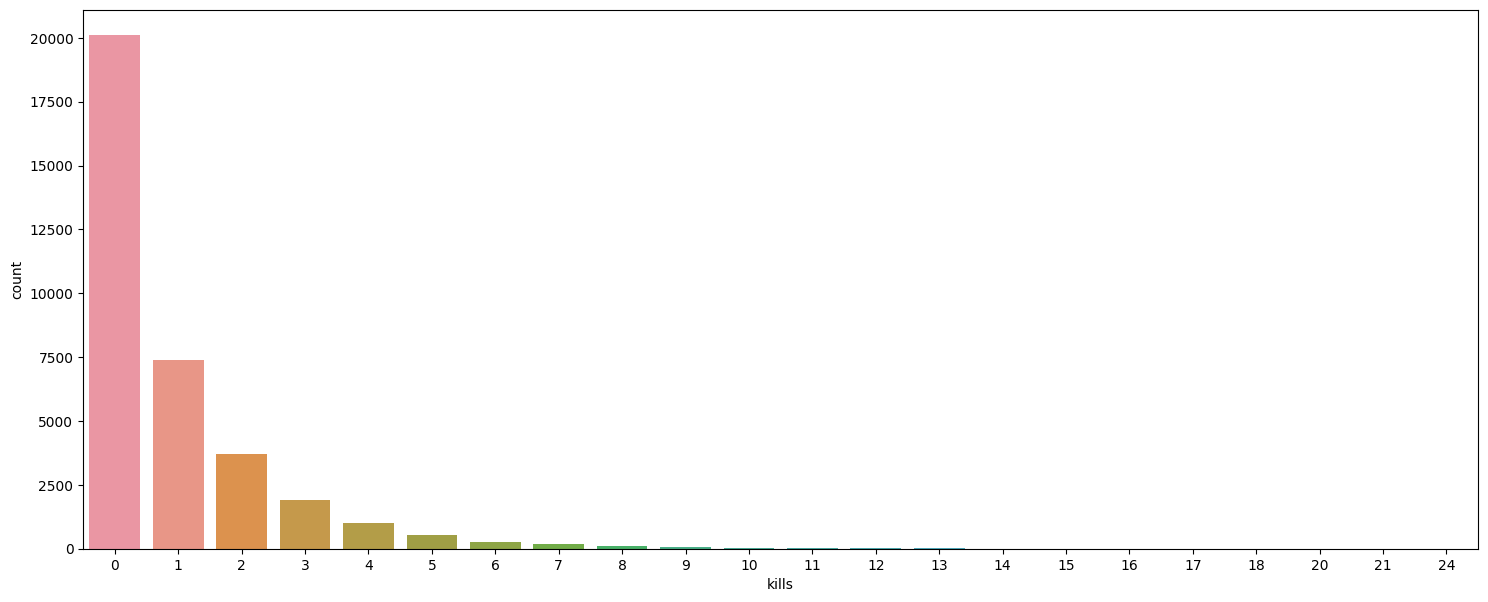

In [ ]:
plt.figure(figsize = (18, 7))
sns.countplot(x = df.kills)
plt.show()

Here from the graph we can see all the above feature have their most of the value lying in the zero region and their higher values graph are somewhat sparse on the basis of count

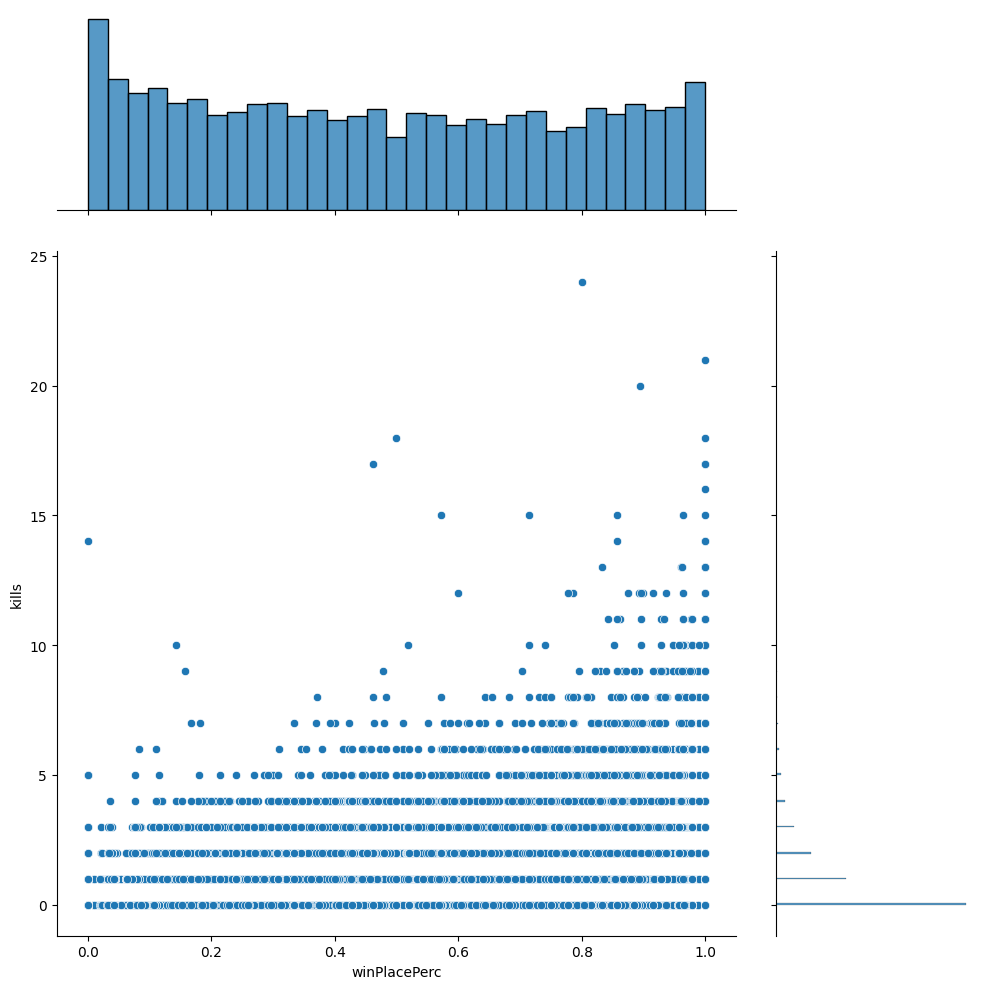

In [ ]:
sns.jointplot(x="winPlacePerc", y="kills", data=df, height=10, ratio=3)
plt.show()

Winners get the most kills

## Kill Streaks

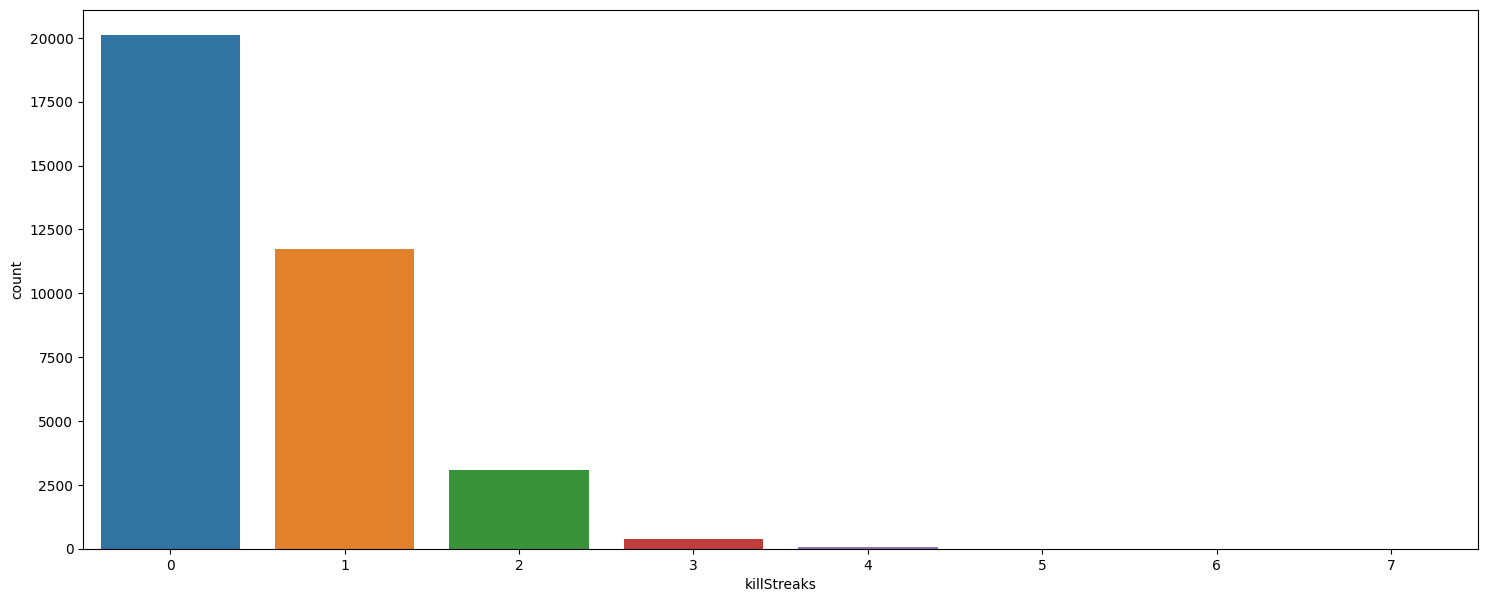

In [ ]:
plt.figure(figsize = (18, 7))
sns.countplot(x = df.killStreaks)
plt.show()

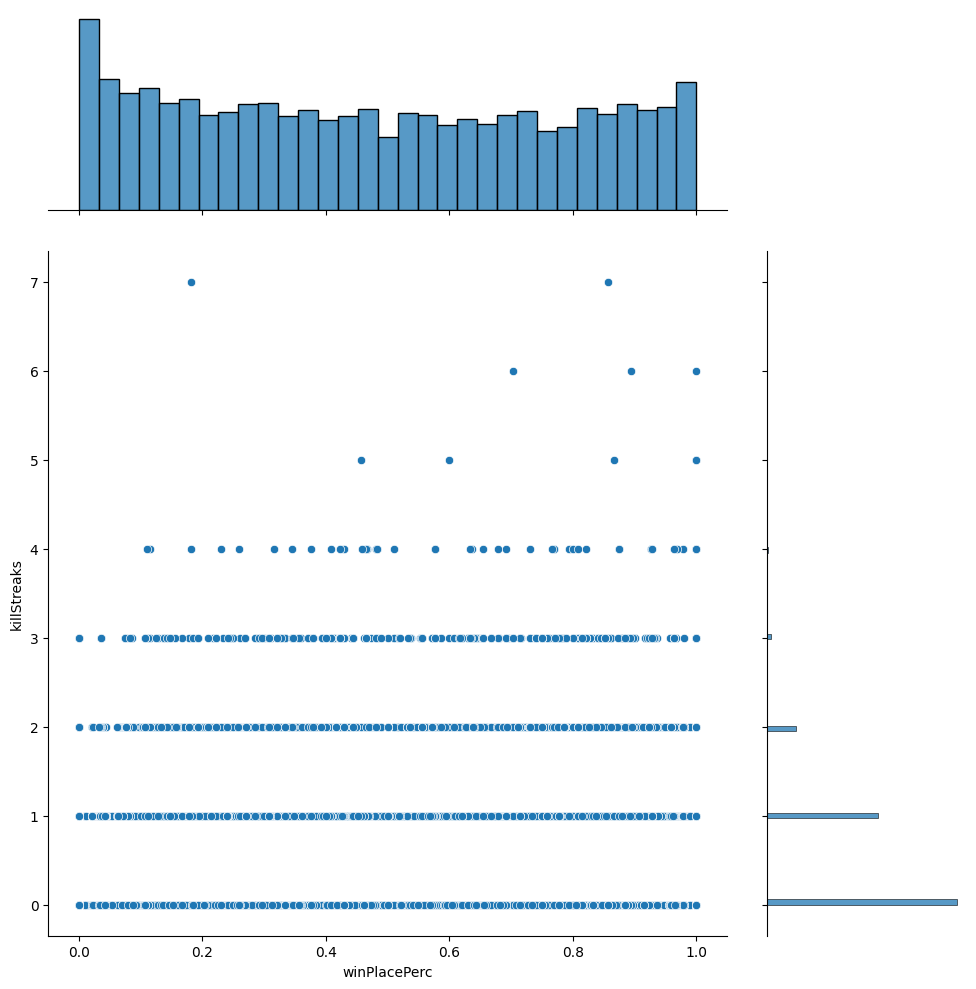

In [ ]:
sns.jointplot(x="winPlacePerc", y="killStreaks", data=df, height=10, ratio=3)
plt.show()

Killsteak grows along with the top players

## Longest Kill

In [ ]:
df.longestKill.min()

0.0

In [ ]:
df.longestKill.max()

651.3

The minimum distance of a kill is 0 probably using a melee weapon

The maxinum distance kill is 651.3 probably by a sniper weapon

## Match Duration

In [ ]:
df.matchDuration.min()

209

In [ ]:
df.matchDuration.max()

2218

A single match will last from 209 seconds to 2218 seconds

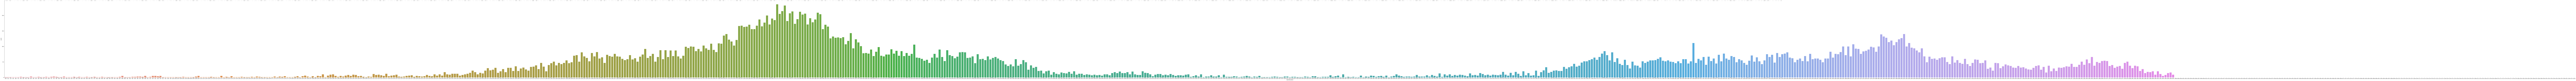

In [ ]:
plt.figure(figsize = (500, 15))
sns.countplot(x = df.matchDuration)
plt.show()

If a player survived in initial stage of the game there is a chance they can die at 1376 seconds and 1887 seconds if they are not winning the match

## Max Place

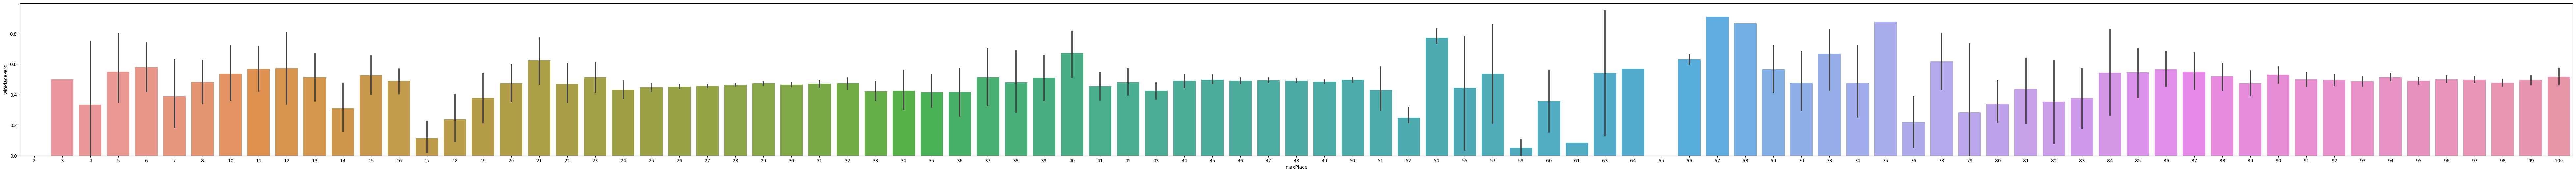

In [ ]:
plt.figure(figsize=(100,6))
sns.barplot(x=df.maxPlace, y = df.winPlacePerc)
plt.show()

<Axes: xlabel='boosts', ylabel='winPlacePerc'>

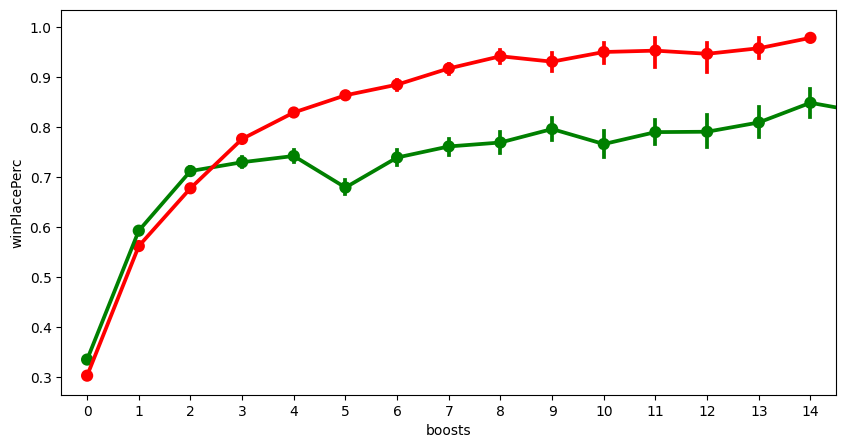

In [ ]:
f,ax1 = plt.subplots(figsize =(10,5))
sns.pointplot(x='heals',y='winPlacePerc',data=df, color = 'green')
sns.pointplot(x='boosts',y='winPlacePerc',data=df, color = 'red')

Healing is used mostly when compare to boosts, as healing will give immediate effect on the health

## Number of Groups

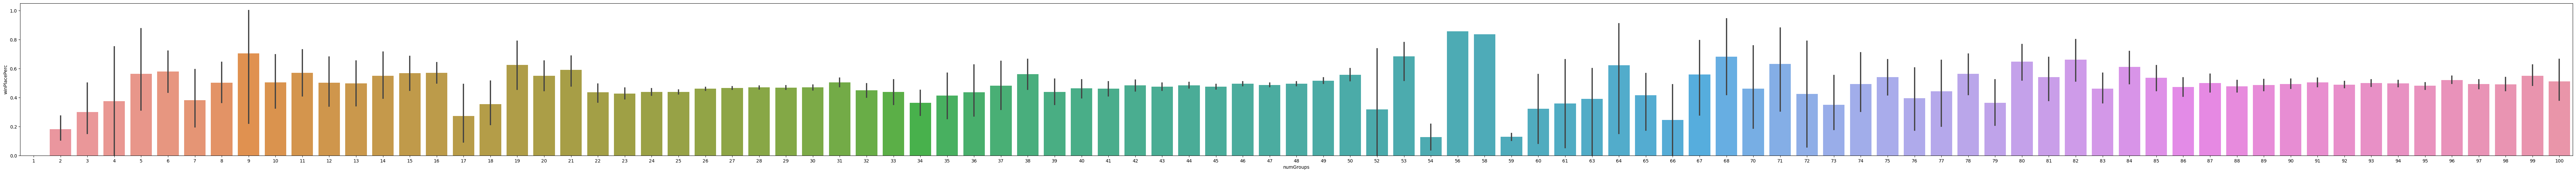

In [ ]:
plt.figure(figsize=(100,6))
sns.barplot(x=df.numGroups, y = df.winPlacePerc)
plt.show()

## Rank Points 

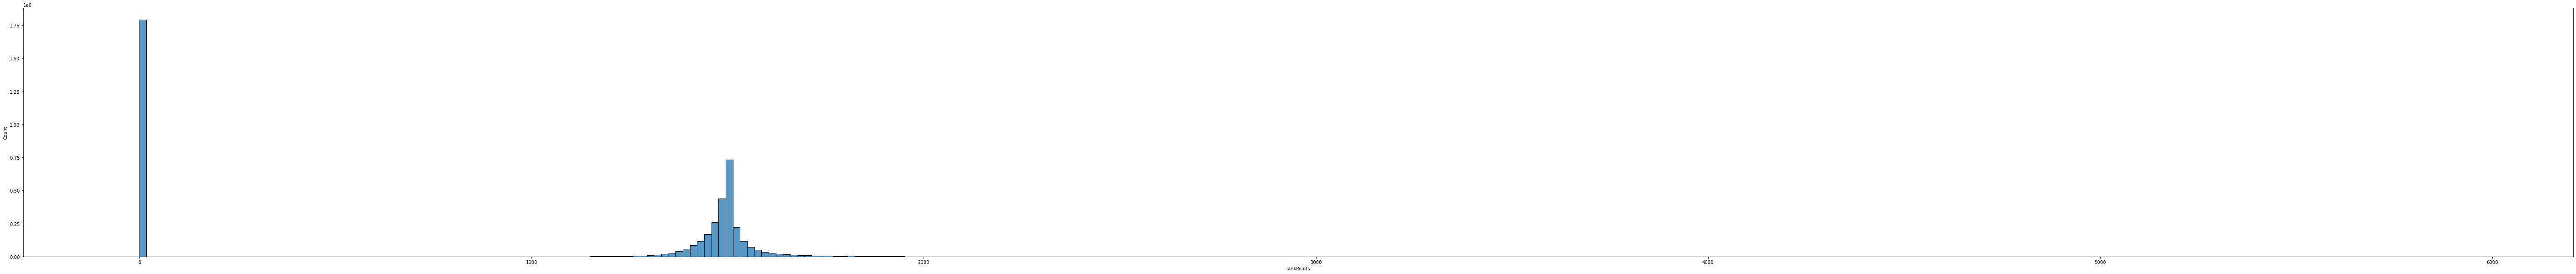

In [ ]:
plt.figure(figsize=(100,10))
sns.histplot(x = df.rankPoints)
plt.show()

## Revives

In [ ]:
df.revives.max()

8

<Axes: xlabel='revives', ylabel='Count'>

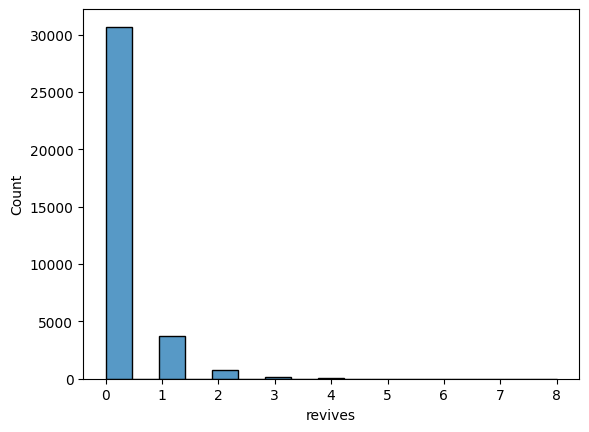

In [ ]:
sns.histplot(x=df.revives)

## Ride Distance 

In [ ]:
df.rideDistance.max()

25930.0

<Axes: xlabel='rideDistance', ylabel='winPlacePerc'>

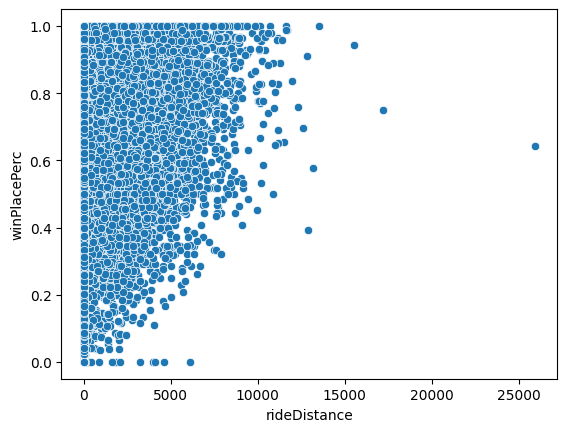

In [ ]:
sns.scatterplot(x='rideDistance',y='winPlacePerc',data=df)

## Road Kills 

In [ ]:
df.roadKills.max()

5.0

<Axes: xlabel='roadKills', ylabel='winPlacePerc'>

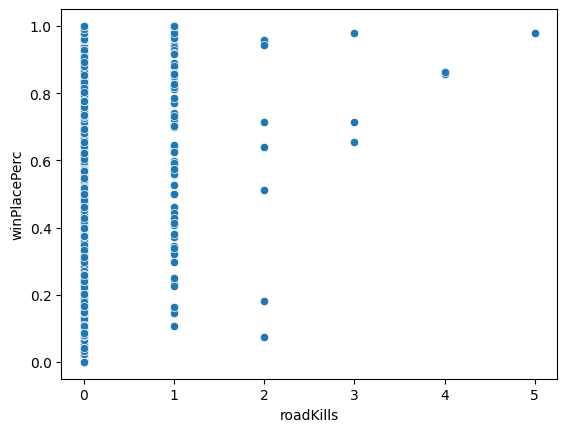

In [ ]:
sns.scatterplot(x='roadKills',y='winPlacePerc',data=df)

## Swim Distance

In [ ]:
df.roadKills.max()

5.0

<Axes: xlabel='roadKills', ylabel='winPlacePerc'>

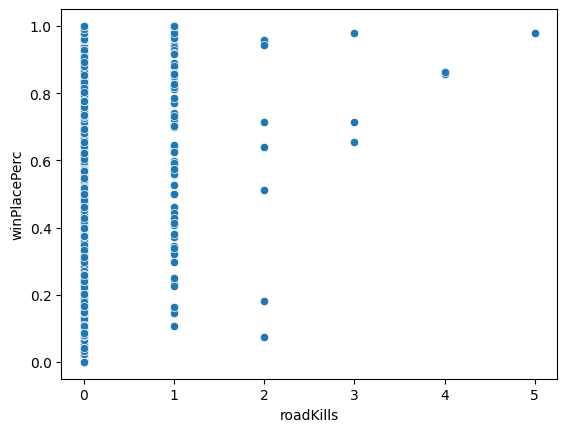

In [ ]:
sns.scatterplot(x='roadKills',y='winPlacePerc',data=df)

## Team Kills 

In [ ]:
df.teamKills.max()

4.0

<Axes: xlabel='roadKills', ylabel='winPlacePerc'>

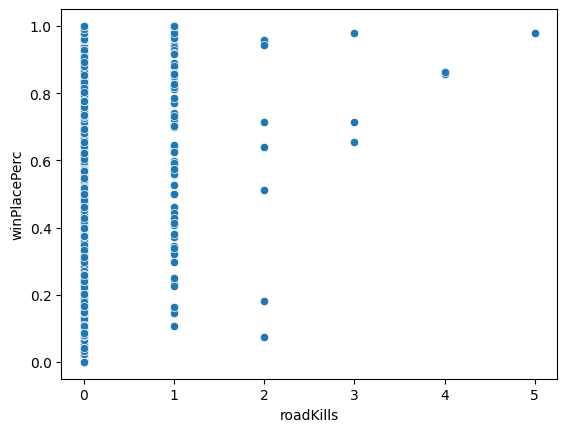

In [ ]:
sns.scatterplot(x='roadKills',y='winPlacePerc',data=df)

## Vehicle Destroys 

In [ ]:
df.vehicleDestroys.max()

2.0

<Axes: xlabel='vehicleDestroys', ylabel='winPlacePerc'>

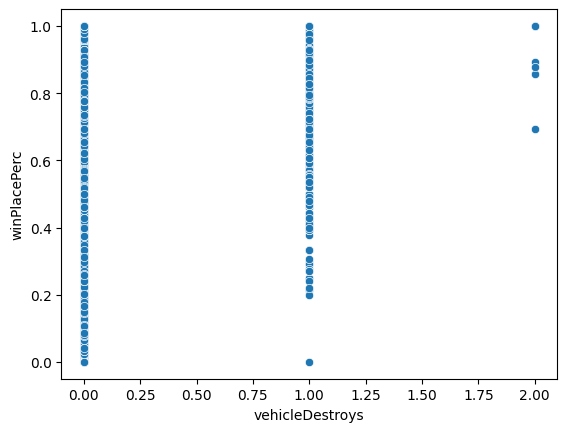

In [ ]:
sns.scatterplot(x='vehicleDestroys',y='winPlacePerc',data=df)

## Walk Distance

In [ ]:
df.walkDistance.max()

13530.0

<Axes: xlabel='walkDistance', ylabel='winPlacePerc'>

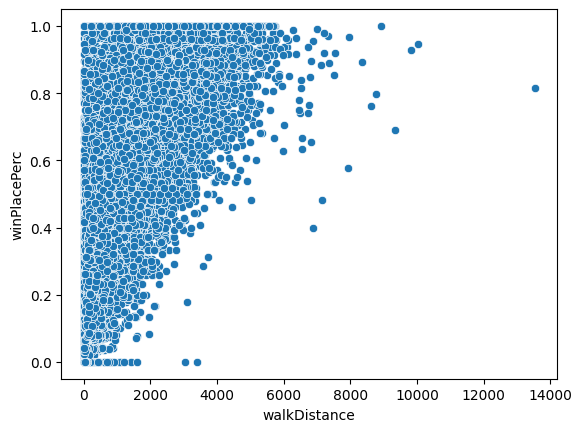

In [ ]:
sns.scatterplot(x='walkDistance',y='winPlacePerc',data=df)

## Weapons Acquired

In [ ]:
df.weaponsAcquired.max()

43.0

<Axes: xlabel='weaponsAcquired', ylabel='winPlacePerc'>

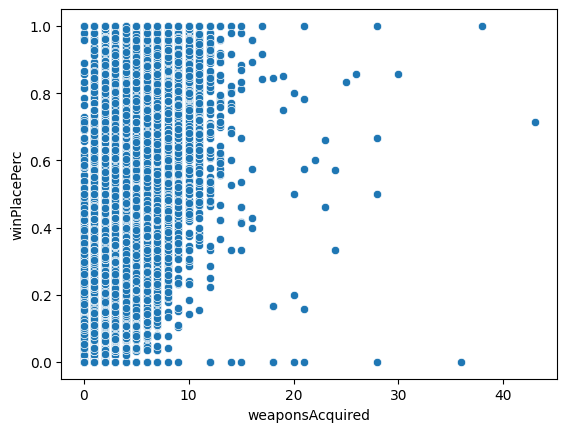

In [ ]:
sns.scatterplot(x='weaponsAcquired',y='winPlacePerc',data=df)

## Win Points

In [ ]:
df.winPoints.max()

1906.0

<Axes: xlabel='winPoints', ylabel='winPlacePerc'>

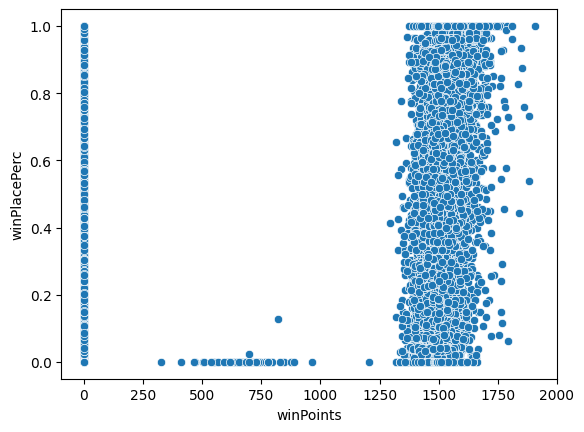

In [ ]:
sns.scatterplot(x='winPoints',y='winPlacePerc',data=df)

## Winner Place Prediction 

<Axes: xlabel='winPlacePerc'>

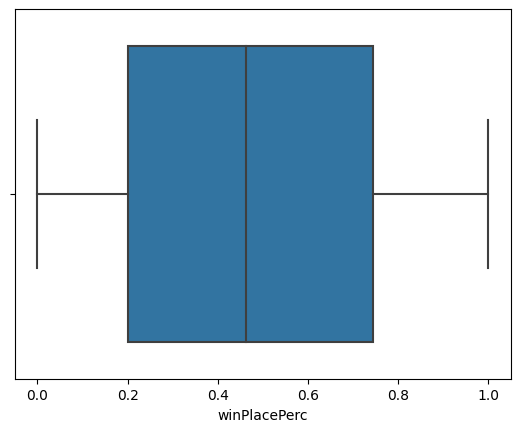

In [ ]:
sns.boxplot(x=df.winPlacePerc)

In [ ]:
print((df.winPlacePerc == 1).sum(),'is the total number of Chicken Dinners')

1025 is the total number of Chicken Dinners


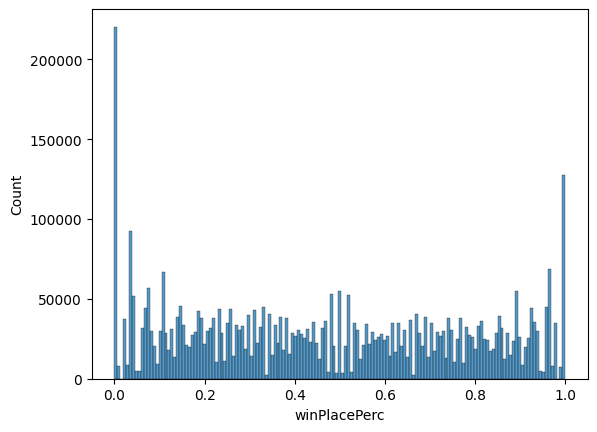

In [ ]:
sns.histplot(x = df.winPlacePerc)
plt.show()

## Correlation

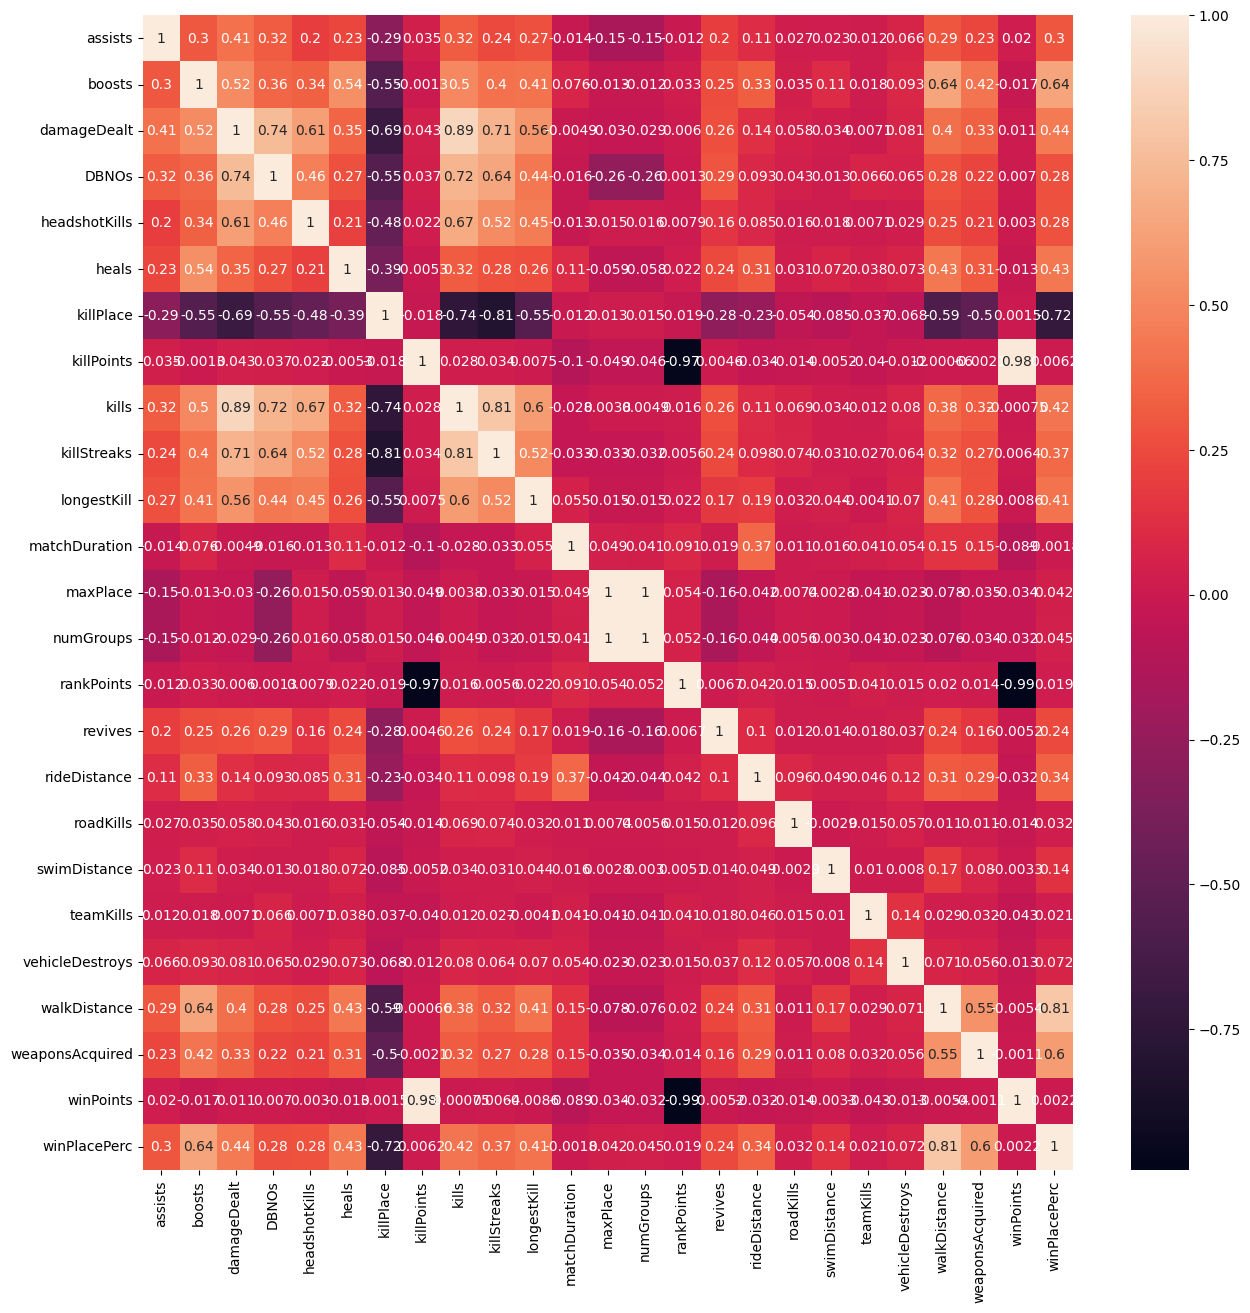

In [ ]:
plt.figure(figsize = (15, 15))
data_corr = df.corr()
sns.heatmap(data_corr, annot = True)
plt.show()

In [ ]:
# Finding correlation for all the variables againts winPlacePerc and sorting them in ascending order
table = data_corr['winPlacePerc'].sort_values(ascending=False)
table

winPlacePerc       1.000000
walkDistance       0.810294
boosts             0.635161
weaponsAcquired    0.598669
damageDealt        0.441962
heals              0.433740
kills              0.420788
longestKill        0.409382
killStreaks        0.373825
rideDistance       0.342099
assists            0.298758
headshotKills      0.281723
DBNOs              0.275775
revives            0.241667
swimDistance       0.143206
vehicleDestroys    0.071959
numGroups          0.045228
maxPlace           0.042152
roadKills          0.031862
teamKills          0.020905
rankPoints         0.019314
killPoints         0.006155
winPoints          0.002171
matchDuration     -0.001845
killPlace         -0.716956
Name: winPlacePerc, dtype: float64

killPoints, rankPoints and winPoints are highly correlated


killPlace and winPlacePerc have a high correlation


numGroups and maxPlace are highly correlated


walkDistance is the most positively correlated variable with the target variable


killPlace is the most negatively correlated variable with the target variable

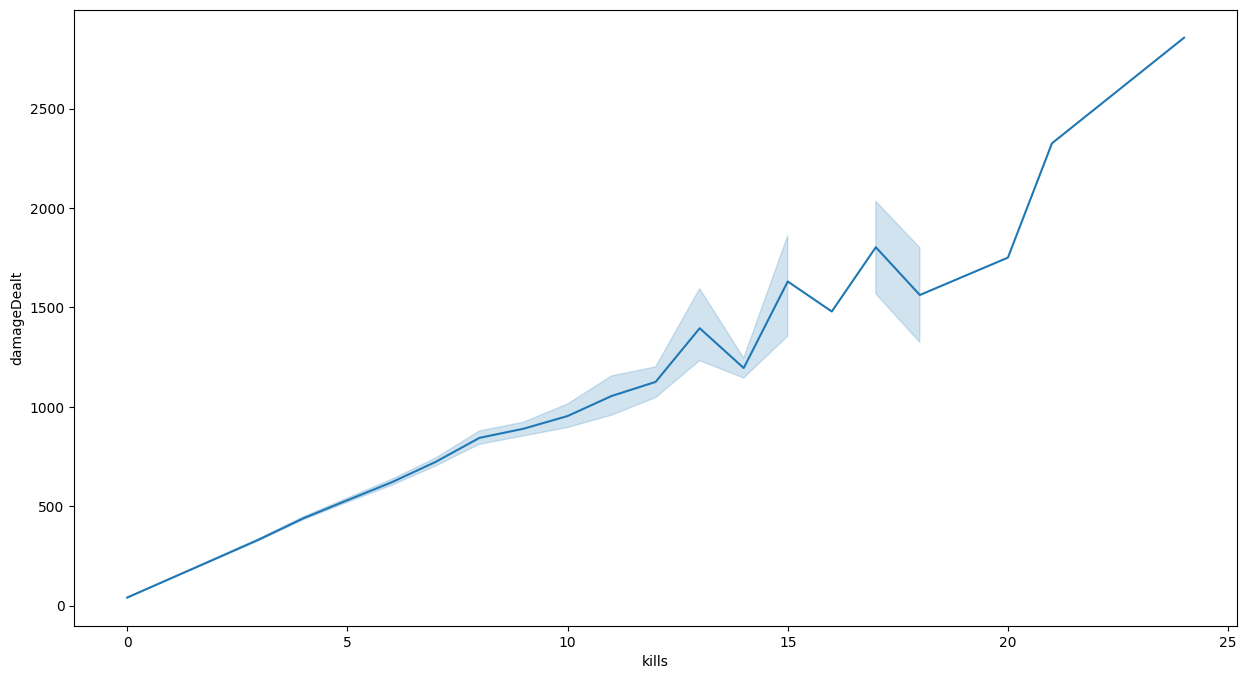

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df.kills, y=df.damageDealt)
plt.show()

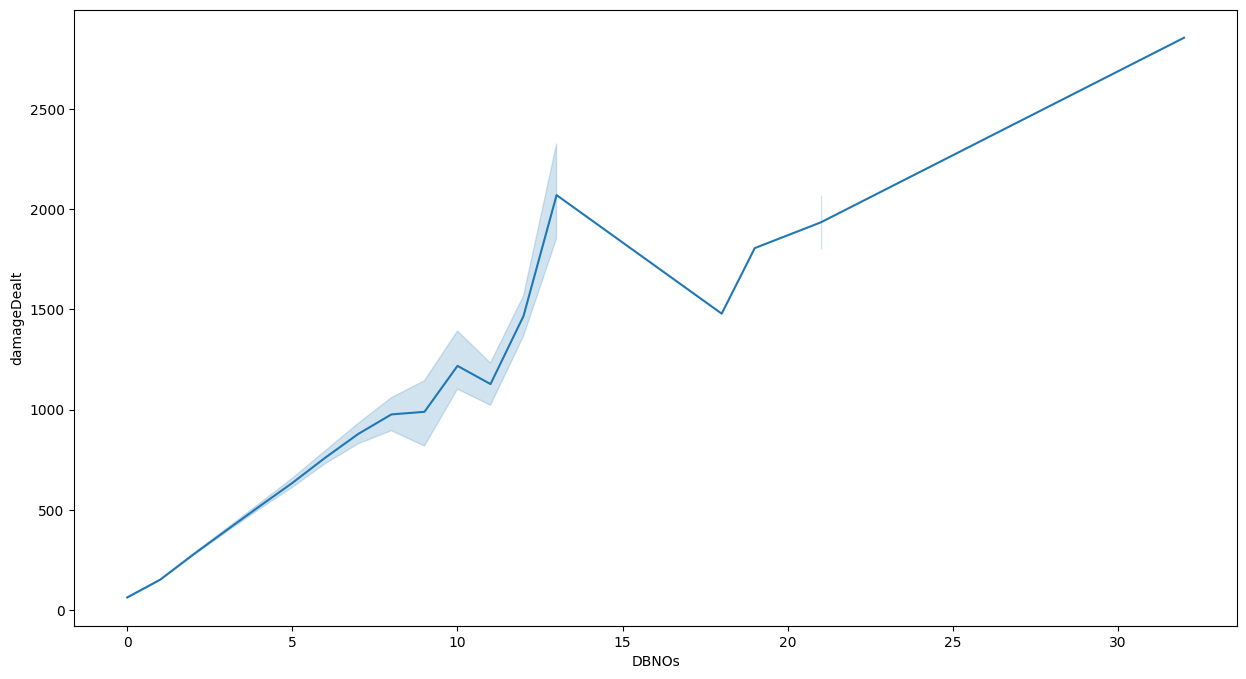

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df.DBNOs, y=df.damageDealt)
plt.show()

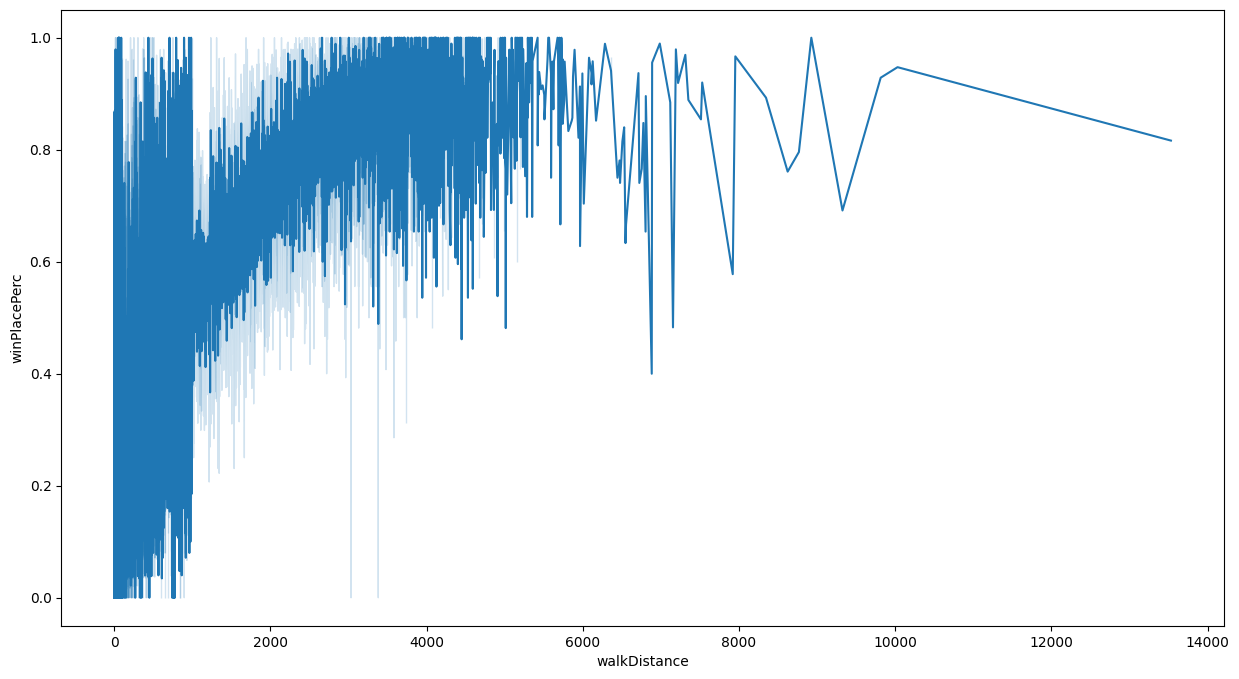

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df.walkDistance, y=df.winPlacePerc)
plt.show()

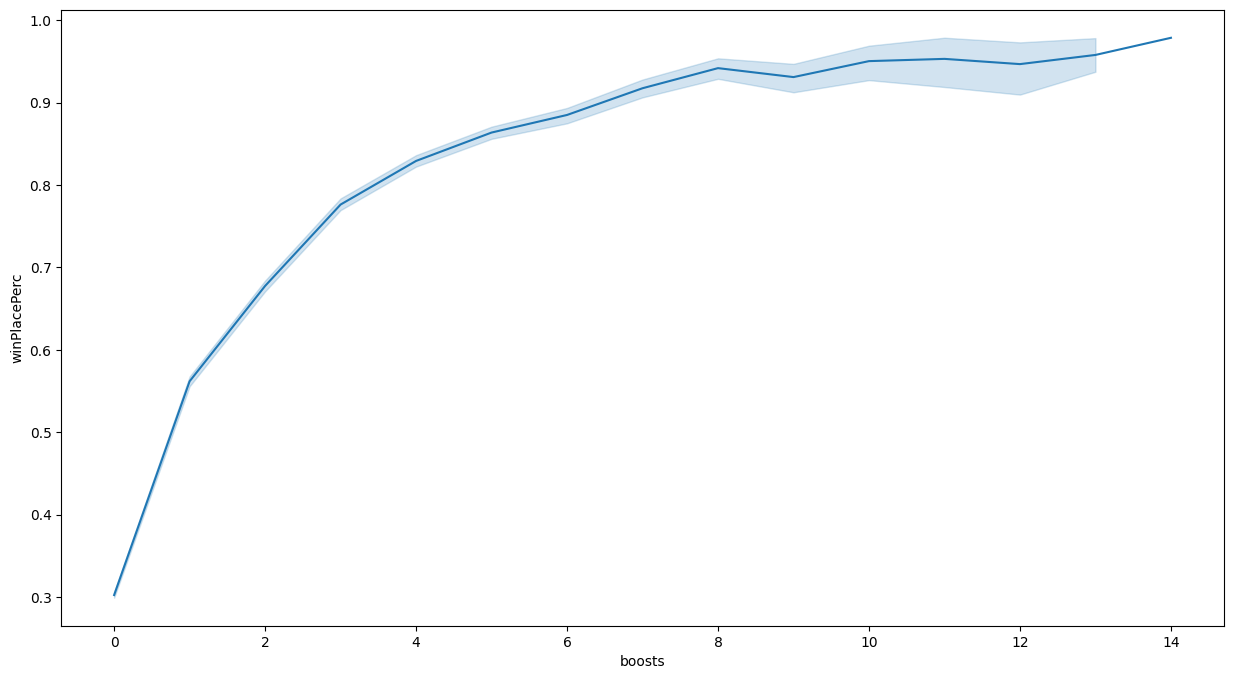

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df.boosts, y=df.winPlacePerc)
plt.show()

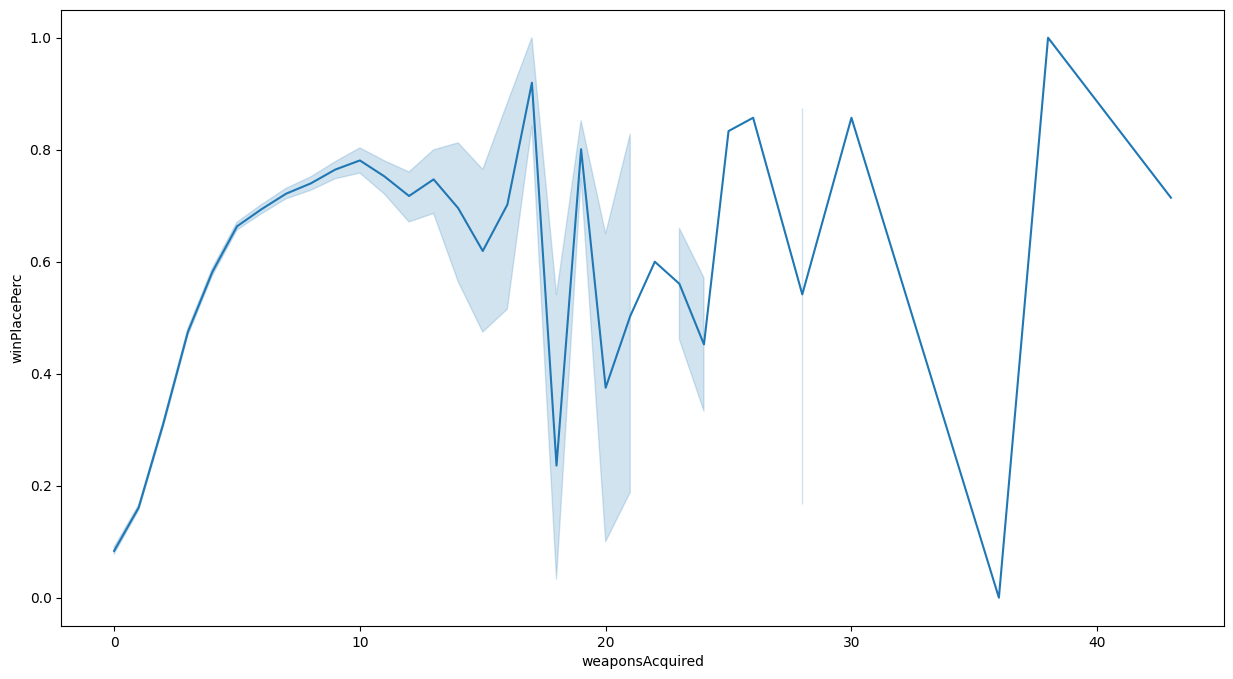

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df.weaponsAcquired, y=df.winPlacePerc)
plt.show()

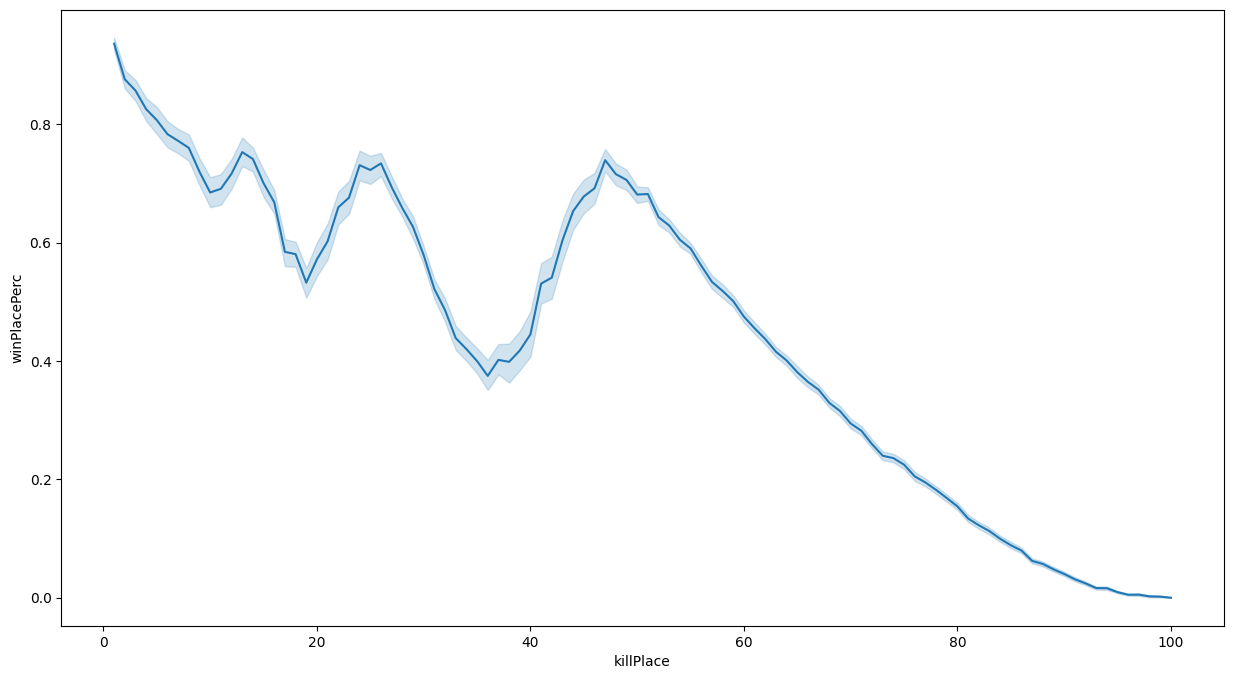

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df.killPlace, y=df.winPlacePerc)
plt.show()

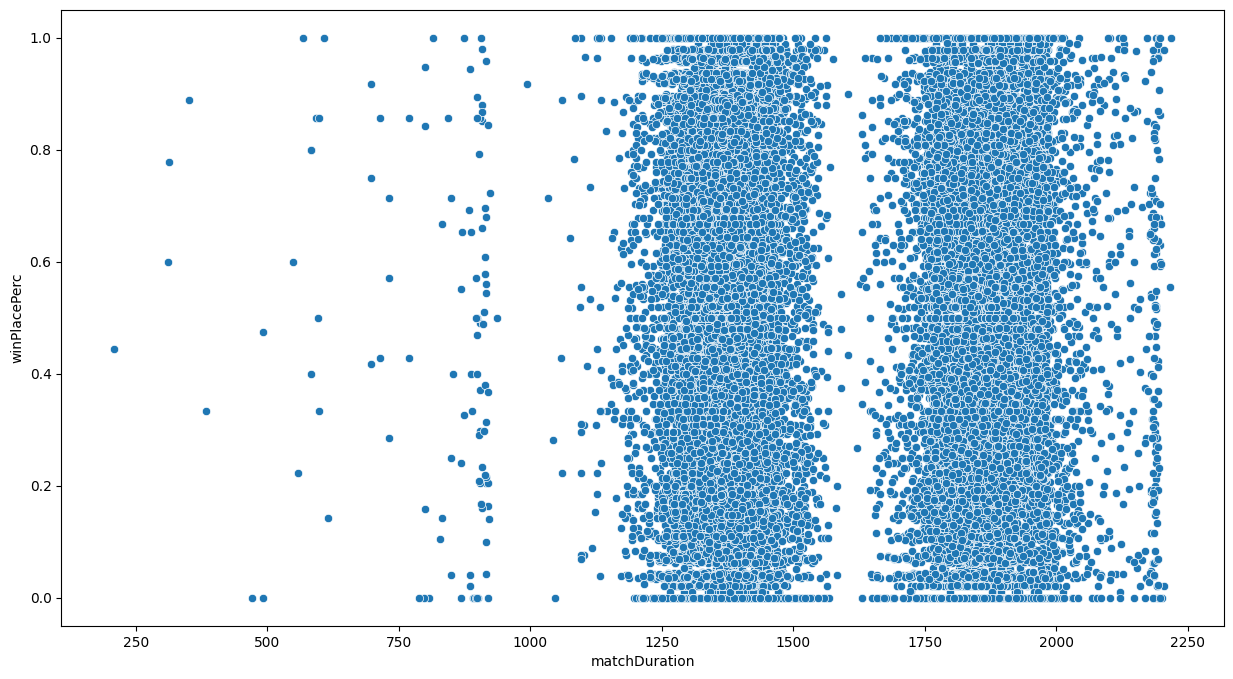

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df.matchDuration, y=df.winPlacePerc)
plt.show()

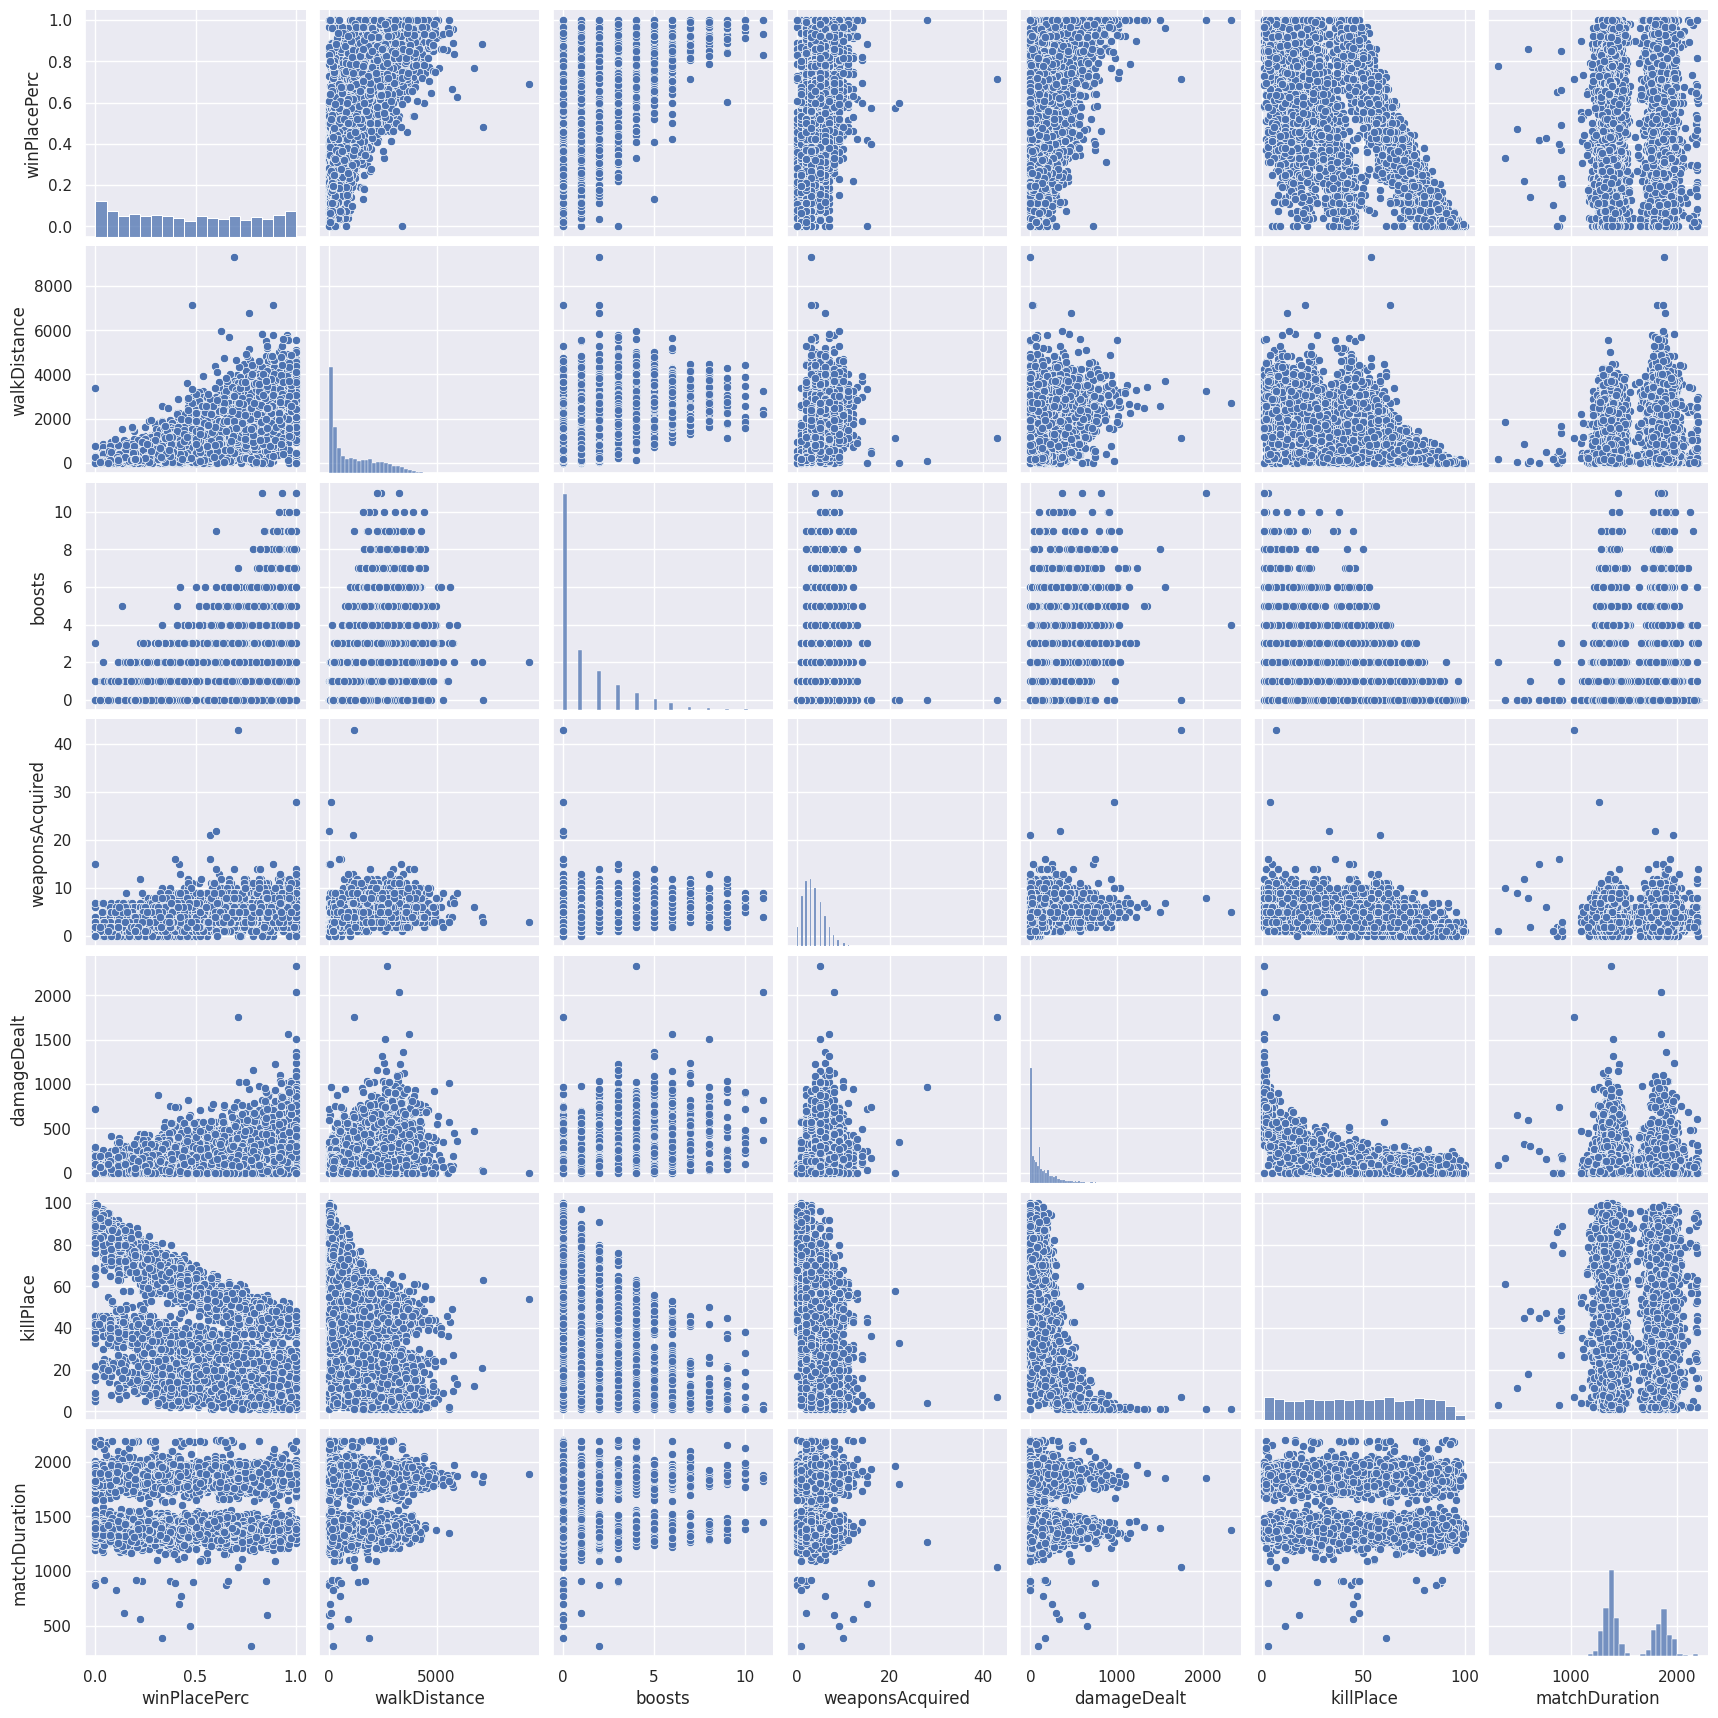

In [10]:
# Pair plot for the most important variables that is most positively and negatively correlated
sns.set()
cols = ['winPlacePerc', 'walkDistance', 'boosts', 'weaponsAcquired', 'damageDealt', 'killPlace','matchDuration']
sns.pairplot(df[cols], size = 2.5)
plt.show()

## Modeling

In [ ]:
# lable encoding is to convert categorical data into nummbers
label_encoder = preprocessing.LabelEncoder()
df['matchType']= label_encoder.fit_transform(df['matchType'])

In [ ]:
df.head()

Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0         0.00      0              0      0         60  ...        0   
1        91.47      0              0      0         57  ...        0   
2        68.00      0              0      0         47  ...        0   
3        32.90      0              0      0         75  ...        0   
4       100.00      0              0      0         45  ...        0   

   rideDistance  roadKills  swimDistance  teamKills  vehicleDestroys  \
0        0.0000        0.0          0.00        0.0              0.0   
1        0.0045        0.0         11.04        0.0              0.0   
2        0.0000        0.0          0.00        0.0              0.0   
3        0.0000        0.0          0.00        0.0              0.0   
4        0.0000        0.0          0.00        0.0              0.0   

   walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0        244.80              1.0     1466.0        0.4444  
1       1434.00              5.0        0.0        0.6400  
2        161.80              2.0        0.0        0.7755  
3        202.70              3.0        0.0        0.1667  
4         49.75              2.0        0.0        0.1875  

[5 rows x 29 columns]

## Linear Regression

In [ ]:
# Assigning the X and y variables ('ID', 'Group ID', 'Match ID' is ignored as that is not relevent to the prediction)
X = df.iloc[:,3:-1]
y = df.winPlacePerc

In [ ]:
# Feature Selection

# create a Linear Regression model
lr_model = LinearRegression()

# create a SequentialFeatureSelector object with CFS
sfs = SequentialFeatureSelector(lr_model,
           k_features=10,
           scoring='r2',
           cv=5)

# fit the SequentialFeatureSelector object to the dataset
sfs = sfs.fit(X,y)

In [ ]:
# Best Features
sfs.k_feature_names_

('boosts',
 'killPlace',
 'killStreaks',
 'matchDuration',
 'matchType',
 'maxPlace',
 'numGroups',
 'rideDistance',
 'walkDistance',
 'weaponsAcquired')

In [ ]:
# Considering only the best features that is selected from the feature selection
X = df[list(sfs.k_feature_names_)]
y = df.winPlacePerc

In [ ]:
# Hyperparameters tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)
parameters = {'n_jobs':[3,5,2],
             'positive':[True,False]}

grid_model = GridSearchCV(lr_model, parameters, cv=5, scoring='accuracy', error_score=0)
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=0, estimator=LinearRegression(),
             param_grid={'n_jobs': [3, 5, 2], 'positive': [True, False]},
             scoring='accuracy')

In [ ]:
# Best parameters
grid_model.best_params_

{'n_jobs': 3, 'positive': True}

In [ ]:
# Spliiting Train and Test dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 14, random_state = 42)

# Modle Training and Evaluation
lr_model = LinearRegression(n_jobs=3,positive=True)
lr_model.fit(X_train,y_train)
y_predict = lr_model.predict(X_test)
print('Accuracy of Linear Regression: ',r2_score(y_test,y_predict))

Accuracy of Linear Regression:  0.8926022747022039


## Feature Selection

In [ ]:
selected_features = ['walkDistance','boosts','weaponsAcquired','damageDealt','heals','kills','longestKill','killStreaks','rideDistance','assists','DBNOs','headshotKills','revives']

As the data is really huge we can take only the columns that are highly correlated. i.e., > 0.2

## Random Forest Regressor

In [ ]:
# Considering only the selected columns
X = df[selected_features]
y = df.winPlacePerc

In [ ]:
# Hyperparameters tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)
rf_model = RandomForestRegressor()
parameters = {'n_estimators':[50,100,150],
             'criterion': ['mae','friedman_mse']}

gscv_model = GridSearchCV(rf_model, param_grid=parameters,cv=5)
gscv_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mae', 'friedman_mse'],
                         'n_estimators': [50, 100, 150]})

In [ ]:
gscv_model.best_params_

{'criterion': 'friedman_mse', 'n_estimators': 150}

In [ ]:
# Spliiting Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 20, random_state = 20)

# Modle Training and evaluation
rf_model = RandomForestRegressor(n_estimators=150, criterion='friedman_mse')
rf_model.fit(X_train,y_train)
Y_pre = rf_model.predict(X_test)
print('Accuracy of Random Forest: ',r2_score(y_test,Y_pre))

Accuracy of Random Forest:  0.8530014596924433


## XGB

In [ ]:
# Hyperparameters tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)
xgb_model = XGBRegressor()
parameters = {'n_estimators':[50,100,150],
             'max_depth': [6,8]}

gscv_model = GridSearchCV(xgb_model, param_grid=parameters,cv=5)
gscv_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'max_depth': [6, 8], 'n_estimators': [50, 100, 150]})

In [ ]:
gscv_model.best_params_

{'max_depth': 6, 'n_estimators': 50}

In [ ]:
# Spliiting Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25, random_state=42)

# Modle Training and evaluation
model_xgb = XGBRegressor(n_estimators=50, max_depth=6)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)
print('Accuracy of XGBoost: ',r2_score(y_test,y_pred))

Accuracy of XGBoost:  0.8909395800455945


# Final Report
## Introduction
1) PUBG (PlayerUnknown's Battlegrounds) is a popular online multiplayer battle royale game that involves up to 100 players fighting against each other to be the last person or team standing.

2) Predicting the winner of a PUBG game can be a challenging business problem, but it can be tackled using machine learning techniques.

## Objective

To develop a machine learning model that can accurately predict the outcome of a game based on various inputs such as walkDistance, boosts, weaponsAcquired, damageDealt, heals, kills, headshotKills,. etc.

## Steps Followed

1) Define the problem

2) Gather data

3) Preprocess the data

4) Feature engineering

5) Choose a machine learning algorithm

6) Train, Tuning and evaluate the model

## Dataset

1) The dataset mainly consists of information on the stats of anonymous players in pubg

2) There are totally 29 columns including the target variable
    
    25 Integer columns
    
    4 Categorical columns
    
## Data Preparation

1) The data had single row of null values which was removed.

2) There are no duplicate values in the dataset

## Exploratory Data Analysis

1) Since there are many categories for matchType column they have been grouped together into 3 categories: 'solo', 'duo' and 'squad'.
    
2) The full matchType column was categories into 2 categories: 'fpp' and 'tpp'

3) The dataset 

## Model Training and Evaluation

We have tried with different models such as:

    1) Linear Regression (Accuracy – 89.26%)
    
    2) Random Forest Regression (Accuracy - 85.30%)
    
    3) XG Boost Regression (Accuracy - 89.09%)
    

##### Performed Feature selection and Hyperparamater tuning for Linear Regression, Random Forest Regression , XG Boost Regression which increased the model's accuracy.

### Decision Tree Classifier gave the highest accuracy of 90%

## Limitations

1) The system we are working on does have the capacity to run other models such as KNN, SVM, etc,.

2) Hyperparameter tuning for other models was performed and it was taking too long to run so we were not able to get the results even though there is no Error.

## Future Work

1) Other models including Neural network can be tried to check if that gives a better R2 score.

## Conclusion
1) From the analysis a player can understand which factor (kills, walk distance, headshotkills, etc,.) the player has to improve to show a better preformance and win the game.

## Business Analysis

1) Target audience: The target audience for PUBG winner prediction could include individual gamers, betting companies, or e-sports enthusiasts who want to make predictions for entertainment or gambling purposes. Understanding the needs and preferences of the target audience is crucial in developing a prediction model that is accurate and relevant.

2) Market demand: The market demand for PUBG winner prediction could be significant, given the popularity of the game and the growing interest in e-sports and online gaming. Betting on e-sports has become increasingly popular in recent years, and the availability of accurate predictions could attract more users and increase revenue for betting companies.

3) Data availability: The availability and quality of data is a key factor in developing an accurate prediction model. In the case of PUBG, data on players' in-game stats, location, terrain, weather conditions, and other relevant factors must be collected and analyzed. Ensuring the accuracy and completeness of data is crucial in developing an effective prediction model.

4) Legal and ethical considerations: Developing a PUBG winner prediction model must comply with legal and ethical standards, including data privacy, fairness, and responsible gambling practices. It is important to ensure that the prediction model is not biased against any particular group of players, and that users are fully informed about how their data is being used.

5) Competitive landscape: The market for PUBG winner prediction could be competitive, with existing players offering similar services or developing their own prediction models. Understanding the competitive landscape and identifying unique value propositions could be key in developing a successful business strategy.
